# DSCI-100 Project Planning Stage (Individual) -- Gloria Guo

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt




## (1) Data Description:


In [68]:
url1 <- "https://raw.githubusercontent.com/gloriagxr07-source/dsci-100-2025w1-personal-project/refs/heads/main/players.csv"
players_data <- read_csv(url1)
url2 <- "https://raw.githubusercontent.com/gloriagxr07-source/dsci-100-2025w1-personal-project/refs/heads/main/sessions.csv"
sessions_data <- read_csv(url2)
players_data
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


Players data: 196 rows (observations) and 7 columns (variables)

- `experience` [Categorical] the experience level of players
- `subscribe` [Categorical] whether subscribe to a game-related newsletter
- `hashedEmail` [Categorical] privacy-safe representations of email addresses
- `played_hours` [Quantitative] the total hours playing the game
- `name` [Categorical] players' names
- `gender` [Categorical] players' genders
- `Age` [Quantitative] players' ages

Sessions data: 1535 rows (observations) and 5 columns (variables)

- `hashedEmail` [Categorical] privacy-safe representations of email addresses
- `start_time` [Categorical] the starts of play sessions
- `end_time` [Categorical] the ends of play sessions
- `original_start_time` [Quantitative] start timestamps in milliseconds since January 1, 1970 (UTC)
- `original_end_time` [Quantitative] end timestamps

Some more specific details (idea from piazza question @988):

In [66]:
summary_players <- summary(players_data)
summary_sessions <- summary(sessions_data)
experience_level <- unique(players_data$experience)

summary_players
summary_sessions
experience_level

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

## (2) Questions:

Based on the broader question `Question 2`, which desires to find out a group of people with the same character that most likely contribute a large amount of data, I will focus on a more specific question -- would players that have longer playing hours more likely to contribute a large amount of data? 

My specific question can find out the relationship between the total hours playing game and the contribution of data amounts. To measure the contribution of data amounts, I will count the numbers of observations every player provides using sessions data and then combine the count column to players data. Finally, this table can be used for predictive methods.

In [27]:
sessions_count <- sessions_data |>
    group_by(hashedEmail) |>
    summarize(count = n()) 
sessions_count

hashedEmail,count
<chr>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1
⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1


In [77]:
players_with_count <- players_data |>
    left_join(sessions_count) |>
    arrange(-count)
players_with_count

Joining with `by = join_by(hashedEmail)`


experience,subscribe,hashedEmail,played_hours,name,gender,Age,count
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Amateur,TRUE,fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,56.1,Dana,Male,23,310
Regular,TRUE,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,Hiroshi,Male,17,219
Amateur,TRUE,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,150.0,Delara,Female,16,159
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,514ebbaa30f0d162127e065ab780892b7930cf8d75944d5eb09c91c02d6026c7,0,Orion,Male,17,NA
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0,Rhys,Male,20,NA
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0,Bailey,Female,17,NA


## (3) Exploratory Data Analysis and Visualization

- `load dataset into R` upload files to a public github repository and read data directly from URL
- `tidy data` already tidy
- `mean value of quantitative variables in players data set`:

In [39]:
mean_quant_players <- players_data |>
    select(played_hours, Age) |>
    map_df(mean, na.rm = T)
mean_players

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918



- `visualization` :

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 71 rows containing missing values or values outside the scale range
(`geom_point()`).”


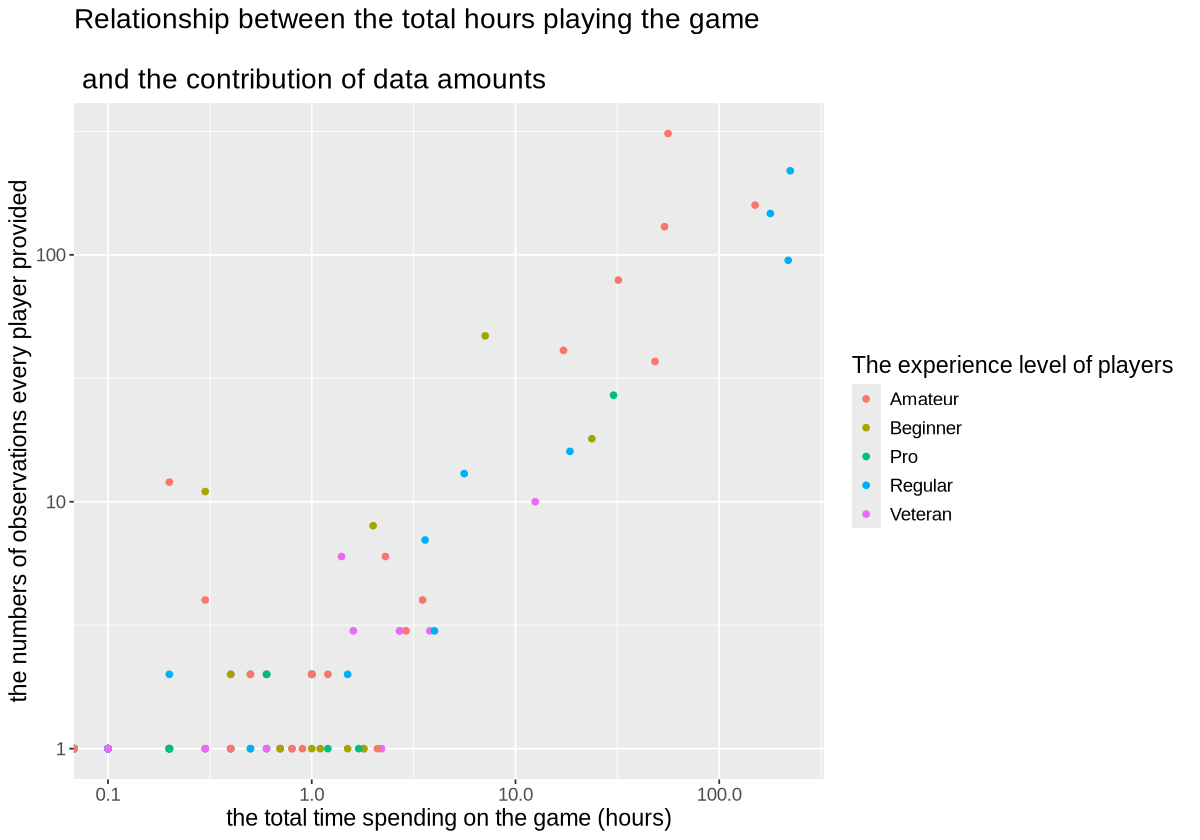

In [79]:
total_hours_plot <- players_with_count |>
    ggplot(aes(x = played_hours, y = count, color = experience)) +
    geom_point() +
    labs(x = "the total time spending on the game (hours)",
         y = "the numbers of observations every player provided",
         color = "The experience level of players") +
    scale_x_log10() +
    scale_y_log10() +
    ggtitle("Relationship between the total hours playing the game 
            \n and the contribution of data amounts") +
    theme(text = element_text(size = 14))

total_hours_plot

- This plot shows a positive, linear and modereate relationship between the total hours playing the game and the numbers of observations that every player provided.
- Players' experience levels do not affect the distribution of this relationship.

Also, though not shown in the data set, longer playing duration might provide more data. Here, I try to find out the relationship between players' experience levels and their personal mean playing duration.

Joining with `by = join_by(hashedEmail)`
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 71 rows containing missing values or values outside the scale range
(`geom_point()`).”


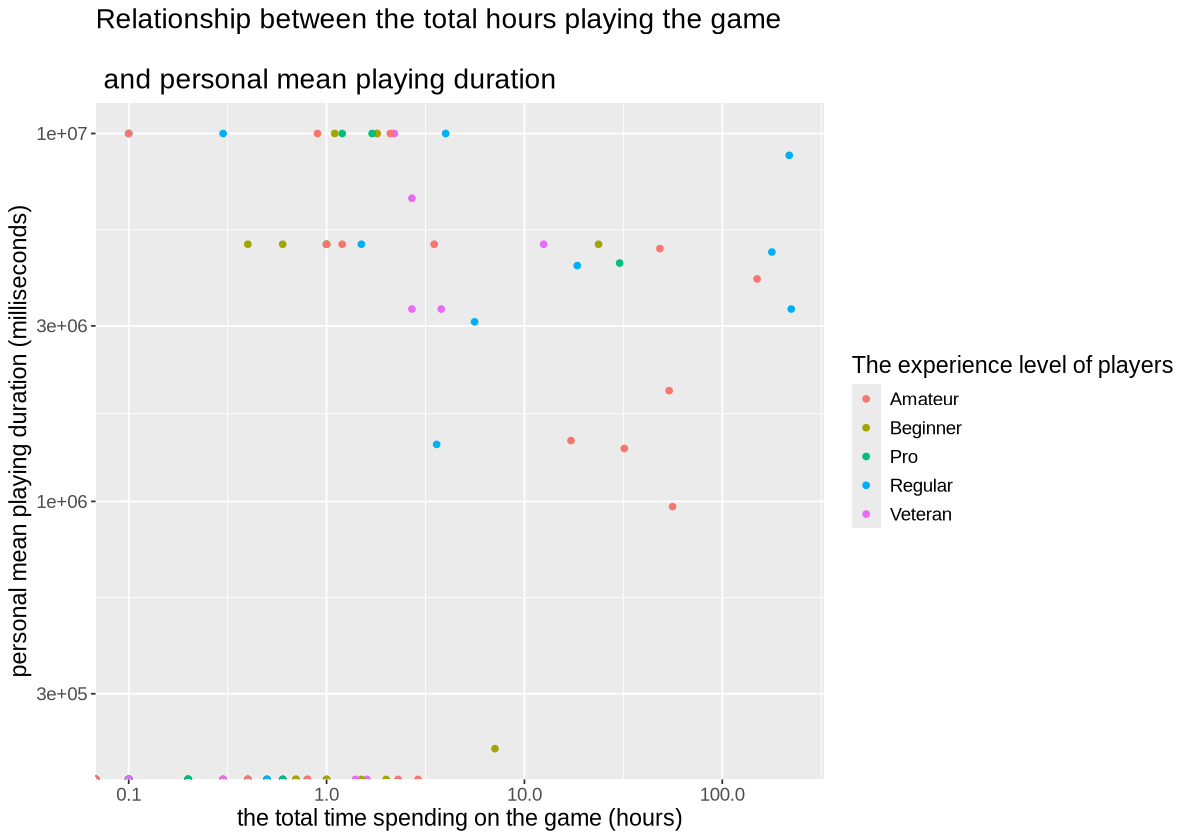

In [82]:
sessions_duration <- sessions_data |>
    rowwise() |>
    mutate(duration = original_end_time - original_start_time) |>
    group_by(hashedEmail) |>
    summarize(avg_duration = mean(duration, na.rm = T)) 

players_with_avgduration <- players_data |>
    left_join(sessions_duration) |>
    arrange(-avg_duration)

plot2 <- players_behaviour |>
    ggplot(aes(x = played_hours, y = avg_duration, color = experience)) +
    geom_point() +
    labs(x = "the total time spending on the game (hours)",
         y = "players' personal mean playing duration (milliseconds)",
         color = "The experience level of players") +
    scale_x_log10() +
    scale_y_log10() +
    ggtitle("Relationship between the total hours playing the game 
            \n and players' personal mean playing duration") +
    theme(text = element_text(size = 14))

plot2

- This plot does not show a relationship between the total hours playing the game and personal mean playing duration.
- Players' experience levels are not related to the distribution of this relationship.